In [1]:
import os
import json
import pandas

In [5]:
bizdata='data/yelp_academic_dataset_business.json'
reviews='data/yelp_academic_dataset_review.json'

In [3]:
def read_data(datafilename):
    data_file = open(datafilename,'r')
    data = []
    for line in data_file:
        data.append(json.loads(line))
    data_file.close()
    return data

In [7]:
#load
bizraw=read_data(bizdata)
bizdf_ = pandas.json_normalize(bizraw,max_level=1)
print(bizdf_.shape)
print(bizdf_.columns)

(192609, 60)
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'attributes.GoodForKids',
       'attributes.RestaurantsReservations', 'attributes.GoodForMeal',
       'attributes.BusinessParking', 'attributes.Caters',
       'attributes.NoiseLevel', 'attributes.RestaurantsTableService',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2',
       'attributes.OutdoorSeating', 'attributes.BikeParking',
       'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi',
       'attributes.Alcohol', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery',
       'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday',
       'hours.Friday', 'hours.Saturday', 'hours.Sunday',
       'attributes.BusinessAcceptsCreditCards', 'attributes',
       'attributes.BusinessAcceptsBitcoin', 'a

In [12]:
#clean
print(bizdf_.shape)
# bizdf_=bizdf_.drop(['hours','attributes'],axis=1)
# print(bizdf_.shape)
bizdf=bizdf_.dropna(subset=['attributes.RestaurantsPriceRange2'])
print(bizdf.shape)
bizdf=bizdf[bizdf['attributes.RestaurantsPriceRange2']!='None']
print(bizdf.shape)
print(bizdf.columns)

(192609, 58)
(108179, 58)
(108082, 58)
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'attributes.GoodForKids',
       'attributes.RestaurantsReservations', 'attributes.GoodForMeal',
       'attributes.BusinessParking', 'attributes.Caters',
       'attributes.NoiseLevel', 'attributes.RestaurantsTableService',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2',
       'attributes.OutdoorSeating', 'attributes.BikeParking',
       'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi',
       'attributes.Alcohol', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery',
       'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday',
       'hours.Friday', 'hours.Saturday', 'hours.Sunday',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.BusinessAcceptsBitcoin',

In [13]:
priceranges=bizdf['attributes.RestaurantsPriceRange2'].value_counts()
print(priceranges)

2    61506
1    33859
3    10462
4     2255
Name: attributes.RestaurantsPriceRange2, dtype: int64


In [14]:
print(bizdf.iloc[0])

business_id                                                         QXAEGFB4oINsVuTFxEYKFQ
name                                                            Emerald Chinese Restaurant
address                                                               30 Eglinton Avenue W
city                                                                           Mississauga
state                                                                                   ON
postal_code                                                                        L5R 3E7
latitude                                                                           43.6055
longitude                                                                         -79.6523
stars                                                                                  2.5
review_count                                                                           128
is_open                                                                                  1

In [15]:
bizdfsmall=bizdf[['business_id', 'name','attributes.RestaurantsPriceRange2','review_count']]
print(bizdfsmall.shape)

(108082, 4)


In [16]:
print(bizdfsmall.iloc[:5])

              business_id                         name  \
1  QXAEGFB4oINsVuTFxEYKFQ   Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
5  68dUKd8_8liJ7in4aWOSEA                The UPS Store   
6  5JucpCfHZltJh5r1JabjDg             Edgeworxx Studio   
7  gbQN7vr_caG_A1ugSmGhWg                    Supercuts   

  attributes.RestaurantsPriceRange2  review_count  
1                                 2           128  
2                                 2           170  
5                                 2             3  
6                                 2             7  
7                                 3             3  


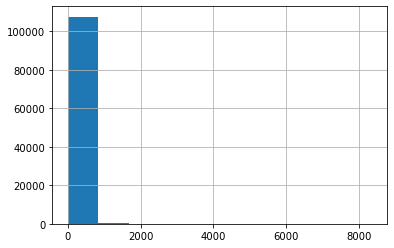

In [17]:
rchist=bizdfsmall['review_count'].hist(bins=10)

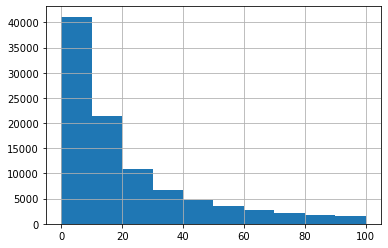

In [19]:
rchist=bizdfsmall['review_count'].hist(bins=10,range=(0,100))

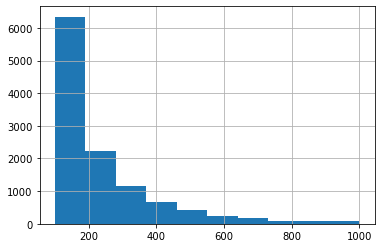

In [20]:
rchist=bizdfsmall['review_count'].hist(bins=10,range=(100,1000))

In [22]:
count0=bizdfsmall[bizdfsmall['review_count']==0]
print(count0)

Empty DataFrame
Columns: [business_id, name, attributes.RestaurantsPriceRange2, review_count]
Index: []


In [21]:
bizdfsmall.to_csv('bizdfsmall.csv',index=False)